In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Utilities.basic_units import radians
from Utilities import orbits as orb
from Utilities import sections as sec

from Utilities.operators import make_tree, from_cylindric
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

In [5]:
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
check = 'Low' # '' or 'HiRes' or 'Res20'
folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}'
snap = '115'
path = f'TDE/{folder}{check}/{snap}'
saving_path = f'Figs/{folder}/{check}'
print(f'We are in: {path}, \nWe save in: {saving_path}')
is_tde = True

Rt = Rstar * (Mbh/mstar)**(1/3)
Rp =  Rt / beta
R0 = 0.6 * Rp
apo = 2 * Rt * (Mbh/mstar)**(1/3)

G_SI = 6.6743e-11
Msol = 2e30 #1.98847e30 # kg
Rsol = 7e8 #6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G_SI ))
c = 3e8 / (7e8/t)

Rs = 2*G*Mbh / c**2

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)

We are in: TDE/R0.47M0.5BH10000beta1S60n1.5Low/115, 
We save in: Figs/R0.47M0.5BH10000beta1S60n1.5/Low


Load data

In [6]:
# sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp, IE, Diss, Entropy = make_tree(path, snap, is_tde, energy = True)
data = make_tree(path, snap, is_tde, energy = False)

# div = np.load(f'{folder}/{snap}/DivV_{snap}.npy')
# shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
# shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

R = np.sqrt(data.X**2 + data.Y**2 + data.Z**2)
THETA, RADIUS_cyl = orb.to_cylindric(data.X, data.Y)
V = np.sqrt(data.VX**2 + data.VY**2 + data.VZ**2)
Vcyl = np.sqrt(data.VX**2 + data.VY**2)
orb_en = orb.orbital_energy(RADIUS_cyl, Vcyl, G, Mbh)
dim_cell = data.Vol**(1/3) # according to Elad
tfb = days_since_distruption(f'{path}/snap_{snap}.h5', m, mstar, Rstar, choose = 'tfb')

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]
# y_surf = y_zone[idx_surf]
# z_surf = z_zone[idx_surf]
# Vx_surf = Vx_zone[idx_surf]
# Vy_surf = Vy_zone[idx_surf]
# dim_cell_surf = dim_cell_zone[idx_surf]
# div_surf = div_zone[idx_surf]

days after disruption: 0.5283548899394039 // t_fall: 2.5777261297507925 // sim_time: 28.659516017187894


Midplane 

In [7]:
midplane = np.abs(data.Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, dim_midplane, VX_midplane, VY_midplane, VZ_midplane, Mass_midplane, Den_midplane, Press_midplane, Temp_midplane, orb_en_midplane = \
    sec.make_slices([data.X, data.Y, data.Z, dim_cell, data.VX, data.VY, data.VZ, data.Mass, data.Den, data.Press, data.Temp, orb_en], midplane)

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.205')

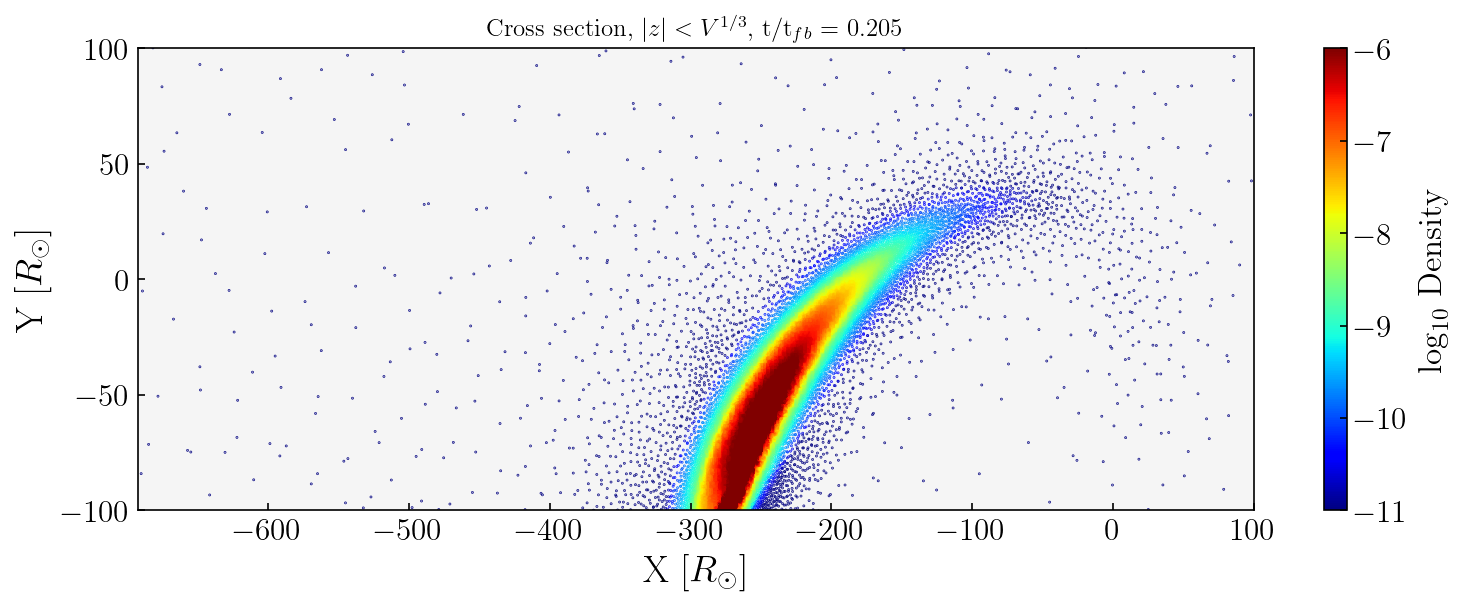

In [8]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane, Y_midplane, c = np.log10(Den_midplane), s = .1, cmap = 'jet', vmin = -11, vmax = -6)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.set_xlim(-apo,100)
ax.set_ylim(-100,100)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))


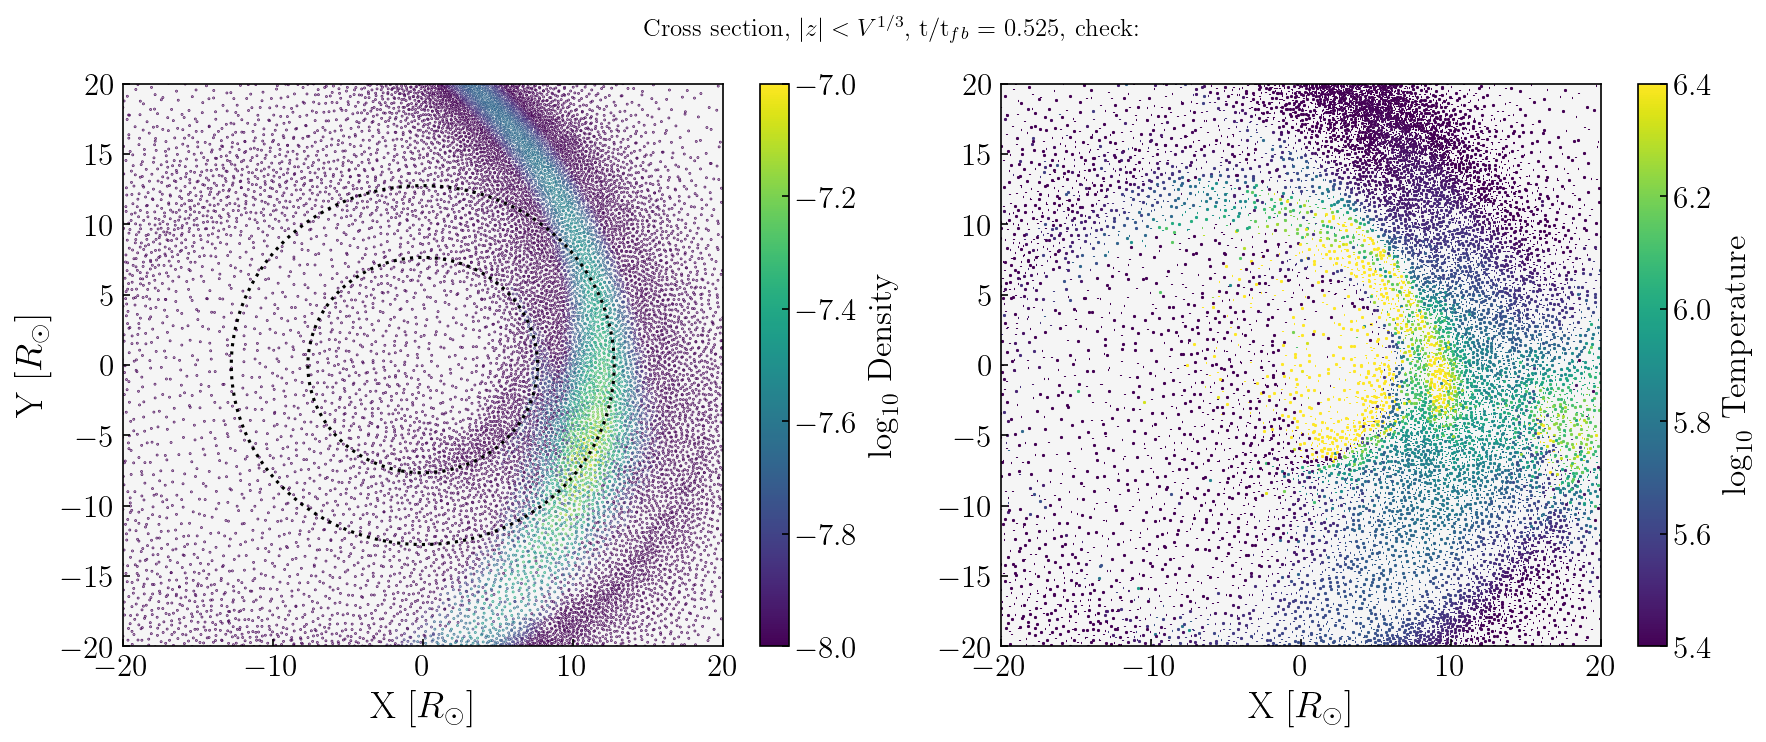

In [39]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
img = ax[0].scatter(X_midplane, Y_midplane, c = log10den_mid, s = 0.1, cmap = 'viridis', vmin = -8, vmax = -7)
ax[0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[0].contour(xcfr0, ycfr0, cfr0, [0], linestyles = 'dotted', colors = 'k')
#ax[0].contour(xcftest, ycftest, cftest, [0], linestyles = 'dotted', colors = 'b')
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax[0].set_xlim(-20,20)
ax[0].set_ylim(-20,20)
ax[0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax[0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[1].scatter(X_midplane, Y_midplane, c = np.log10(Temp_midplane), marker= 's', s = 0.1, cmap = 'viridis', vmin = 5.4, vmax = 6.4)
cbar1 = plt.colorbar(img1)#, format='%.0e')
cbar1.set_label(r'$\log_{10}$ Temperature', fontsize = 16)
#ax[1].quiver(X_midplane[::200], Y_midplane[::200], VX_midplane[::200], VY_midplane[::200], color = 'k', angles='xy', scale_units='xy', width = 1e-3, scale = 10)
ax[1].set_xlim(-20,20)
ax[1].set_ylim(-20, 20)
ax[1].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
plt.suptitle(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)) + f', check: {check}')

plt.tight_layout()
plt.savefig(f'{saving_path}/xy{snap}.png')

X-Z plane

In [40]:
ychosen = Rp
crossXZ = np.abs(data.Y-ychosen) < dim_cell
X_crossXZ, Y_crossXZ, Z_crossXZ, VX_crossXZ, VY_crossXZ, VZ_crossXZ, Den_crossXZ, Temp_crossXZ = \
    sec.make_slices([data.X, data.Y, data.Z, data.VX, data.VY, data.VZ, data.Den, data.Temp], crossXZ)

In [41]:
# fig, ax = plt.subplots(1,2, figsize = (12,5))
# img = ax[0].scatter(X_crossXZ, Z_crossXZ, c = np.log10(Den_crossXZ),  s = 2, cmap = 'jet', vmin = -11, vmax = -6)
# cbar = plt.colorbar(img)
# cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
# ax[0].set_xlim(0,40)
# ax[0].set_ylim(-10,10)
# ax[0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax[0].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)

# img1 = ax[1].scatter(X_crossXZ, Z_crossXZ, c = np.log10(Temp_crossXZ), s = 2, cmap = 'jet', vmin = 4.5, vmax = 8.5)
# cbar1 = plt.colorbar(img1)#, format='%.0e')
# cbar1.set_label(r'$\log_{10}$ Temperature', fontsize = 16)
# #ax[1].quiver(X_crossXZ[::35], Z_crossXZ[::35], VX_crossXZ[::35], VZ_crossXZ[::35], color = 'k', angles='xy', scale_units='xy', width = 2e-3, scale = 10)
# ax[1].set_xlim(0,40)
# ax[1].set_ylim(-10, 10)
# ax[1].set_xlabel(r'X [$R_\odot$]', fontsize = 18)

# plt.suptitle(f'Cross section, Y = ' + str(np.round(ychosen, 2)) + r', t/t$_{fb}$ = ' + str(np.round(tfb,3)))

Tangent and transverse plane

In [42]:
theta_lim = 3/4 * np.pi
step = 0.02
theta_params = [-theta_lim, theta_lim, step]
theta_arr = np.arange(*theta_params)

theta_arr, r_orbit = orb.find_maximum(X_midplane, Y_midplane, dim_midplane, Den_midplane, theta_params)
x_orbit, y_orbit = from_cylindric(theta_arr, r_orbit)


In [43]:
theta_chosen = np.pi/4
idx = np.argmin(np.abs(theta_arr - theta_chosen))
radius_chosen = r_orbit[idx]
x_chosen, y_chosen = from_cylindric(theta_chosen, radius_chosen)

condition_tg = sec.tangent_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, theta_chosen, radius_chosen)
X_tg, Y_tg, Z_tg, Den_tg, Temp_tg, theta_tg = \
    sec.make_slices([data.X, data.Y, data.Z, data.Den, data.Temp, THETA], condition_tg)
X_tg_midplane = X_tg[np.abs(Z_tg) < dim_cell[condition_tg]]
Y_tg_midplane = Y_tg[np.abs(Z_tg) < dim_cell[condition_tg]]


condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, theta_chosen, radius_chosen, coord= True)
X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
    sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]

condition_rad = sec.radial_plane(data.X, data.Y, dim_cell, theta_chosen)
X_rad, Y_rad, Z_rad, Den_rad, RADIUS_cyl_rad = \
    sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_rad)
X_rad_midplane = X_rad[np.abs(Z_rad) < dim_cell[condition_rad]]
Y_rad_midplane = Y_rad[np.abs(Z_rad) < dim_cell[condition_rad]]


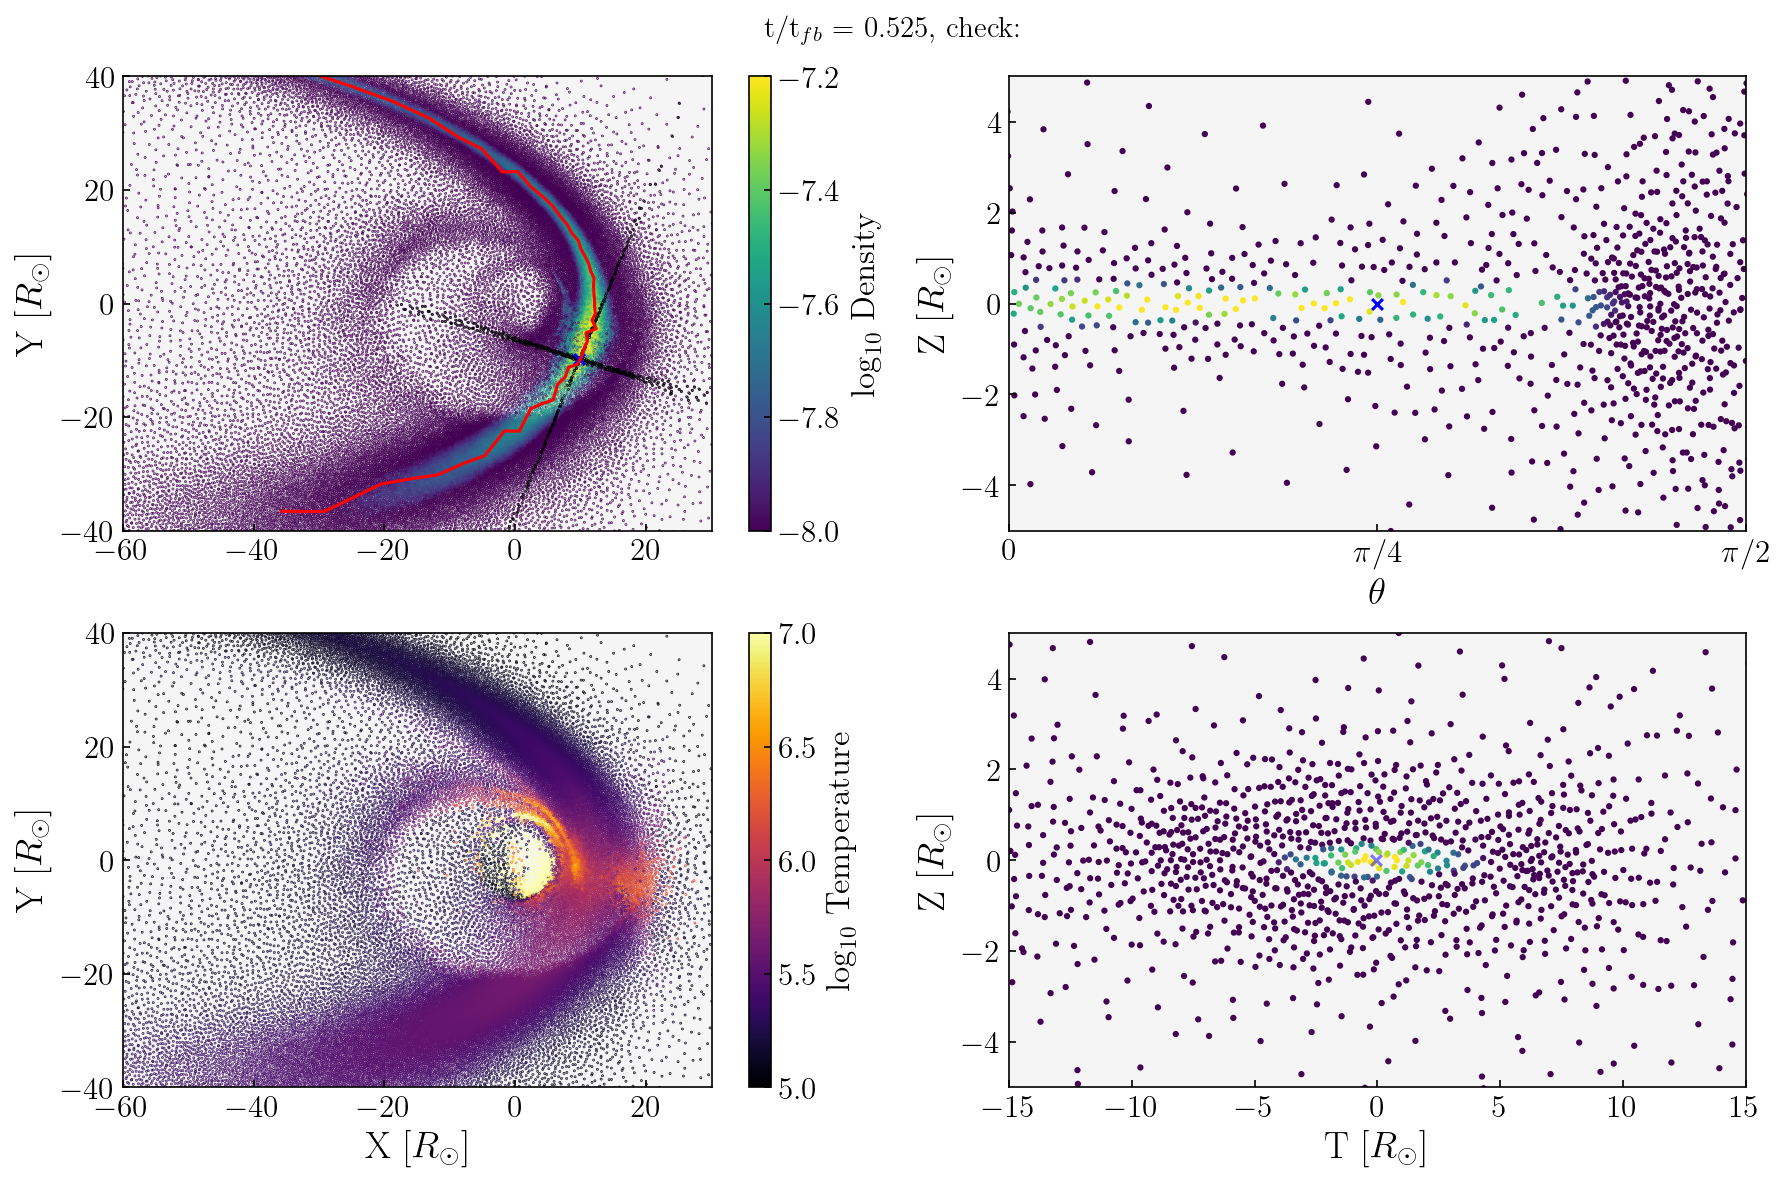

In [47]:
vminrho = -8
vmaxrho = -7.2
fig, ax = plt.subplots(2,2, figsize = (12,8))
img = ax[0][0].scatter(X_midplane, Y_midplane, c = np.log10(Den_midplane), s = .1, cmap = 'viridis', vmin = vminrho, vmax = vmaxrho)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax[0][0].plot(x_orbit, y_orbit, c = 'r')
ax[0][0].scatter(X_tg_midplane, Y_tg_midplane, s = 0.1, c = 'k')
ax[0][0].scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'k')
ax[0][0].scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'b')
ax[0][0].set_xlim(-60,30)
ax[0][0].set_ylim(-40,40)
#ax[0][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax[0][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[1][0].scatter(X_midplane, Y_midplane, c = np.log10(Temp_midplane), s = .1, cmap = 'inferno', vmin = 5, vmax = 7)
cbar1 = plt.colorbar(img1)
cbar1.set_label(r'$\log_{10}$ Temperature', fontsize = 16)
ax[1][0].set_xlim(-60,30)
ax[1][0].set_ylim(-40,40)
ax[1][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax[1][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img2 = ax[0][1].scatter(theta_tg * radians, Z_tg, xunits=radians, c = np.log10(Den_tg),  cmap = 'viridis', s = 4, vmin = vminrho, vmax = vmaxrho)
# cbar2 = plt.colorbar(img2)#, format='%.0e')
# cbar2.set_label(r'$\log_{10}$ Density', fontsize = 14)
ax[0][1].scatter(theta_chosen, 0, marker = 'x', s = 27, c = 'b')
ax[0][1].set_xlim(theta_chosen-np.pi/4, theta_chosen+np.pi/4)
ax[0][1].set_ylim(-5,5)
ax[0][1].set_xlabel(r'$\theta$', fontsize = 18)
ax[0][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)

img3 = ax[1][1].scatter(x_onplane, Z_tra, c = np.log10(Den_tra),  cmap = 'viridis', s = 4, vmin = vminrho, vmax = vmaxrho)
# cbar3 = plt.colorbar(img3)#, format='%.0e')
# cbar3.set_label(r'$\log_{10}$ Density', fontsize = 14)
ax[1][1].scatter(x0, 0, marker = 'x', s = 27, c = 'b', alpha = 0.5)
ax[1][1].set_xlim(-15,15)
ax[1][1].set_ylim(-5,5)
ax[1][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
ax[1][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)

plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,3)) + f', check: {check}', fontsize = 14)
plt.tight_layout()

#plt.savefig(f'Figs/{folder}/{check}/cross{snap}.png')

In [45]:
# fig, ax = plt.subplots(1,1, figsize = (6,4))
# img = ax.scatter(X_midplane, Y_midplane, c = Diss_midplane/Vol_midplane, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
# cbar = plt.colorbar(img)#, format='%.0e')
# cbar.set_label('energy density dissipation', fontsize = 16)
# ax.plot(zone_cross_x, zone_cross_y, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock zone')
# #ax.plot(x_cross_surf, y_cross_surf, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock surface')
# ax.set_xlim(3,29)
# ax.set_ylim(-18,23)
# ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
# plt.grid()
# plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
# plt.legend(loc = 'upper right')
# #plt.savefig('Figs/EnDisszone{snap}.png')